In [114]:
import os
os.chdir('/Users/ltran/Documents/TrueData29/CPC_ML_tutorial/')

import numpy as np
import pandas as pd
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
import random
import joypy
from matplotlib import cm
import joypy
from matplotlib import cm

from scipy.stats import fisher_exact
from pcntoolkit.normative import estimate, predict, evaluate
from pcntoolkit.util.utils import compute_MSLL, create_design_matrix
from nm_utils import calibration_descriptives, remove_bad_subjects, load_2d
from sklearn.model_selection import train_test_split

# Set working directory
root_dir = '/Users/ltran/Documents/TrueData0104/CPC_ML_tutorial/'
out_dir = os.path.join(root_dir,'models','test')

# create the output directory if it does not already exist
os.makedirs(out_dir, exist_ok=True)

# Load TCA & TSA

In [170]:
data_dir = '/Users/ltran/Documents/Data/'

In [171]:
df_tca = pd.read_csv(os.path.join(data_dir, 'TCA_vol/Outputs/df_TCA.csv'))
df_tsa = pd.read_csv(os.path.join(data_dir, 'TSA_vol/Outputs/df_TSA.csv'))

i. Remove 3T in all datasets

In [172]:
df_tca = df_tca[df_tca['magnetic_field_strength'] == '1_5']

In [173]:
instru = pd.read_csv(os.path.join(data_dir, 'TSA_vol/TSA_cohort_dcm_info_anonymized_1.csv'), sep = ';')

In [174]:
# df_tsa = df_tsa.merge(instru.rename(columns={'SubCode BIDS' : 'participant_id'}), on = 'participant_id')

In [175]:
df_tsa = df_tsa[df_tsa['magnetic_field_strength'] == '1_5']

In [176]:
df_asd = df_tsa[df_tsa.ASD == 'Yes']
df_td = df_tsa[df_tsa.ASD == 'No']

# Matching age distribution

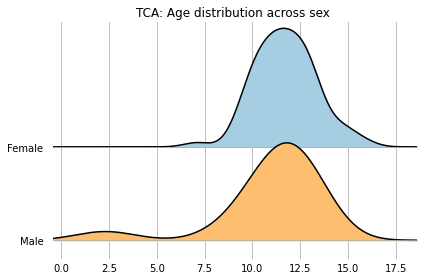

Age = [2.3,15.9]


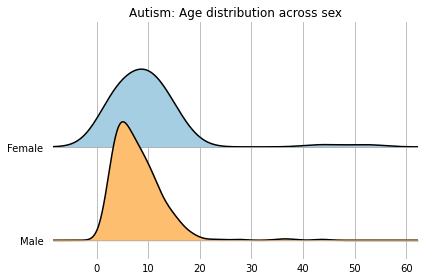

Age = [1.7,52.1]


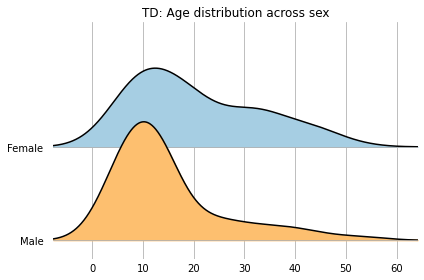

Age = [2.6,53.9]


In [177]:
fig, axes = joypy.joyplot(df_tca[['age_at_scan', 'Sex']], by = 'Sex', grid = True, 
                         title = 'TCA: Age distribution across sex ',
                         ylim = 'max',
                         colormap = cm.Paired)
plt.show()
print(f'Age = [{df_tca.age_at_scan.min()},{df_tca.age_at_scan.max()}]')
fig, axes = joypy.joyplot(df_asd[['age_at_scan', 'sex']].replace({-1 : 'Female', 1 : 'Male'}), by = 'sex', grid = True, 
                         title = 'Autism: Age distribution across sex',
                         ylim = 'max',
                         colormap = cm.Paired)
plt.show()
print(f'Age = [{df_asd.age_at_scan.min()},{df_asd.age_at_scan.max()}]')
fig, axes = joypy.joyplot(df_td[['age_at_scan', 'sex']].replace({-1 : 'Female', 1 : 'Male'}), by = 'sex', grid = True, 
                         title = 'TD: Age distribution across sex',
                         ylim = 'max',
                         colormap = cm.Paired)
plt.show()
print(f'Age = [{df_td.age_at_scan.min()},{df_td.age_at_scan.max()}]')

In [178]:
age_min = 6
age_max = 16

In [179]:
df_tca = df_tca[(df_tca.age_at_scan > age_min) & (df_tca.age_at_scan < age_max)]
df_asd = df_asd[(df_asd.age_at_scan > age_min) & (df_asd.age_at_scan < age_max)]
df_td = df_td[(df_td.age_at_scan > age_min) & (df_td.age_at_scan < age_max)]

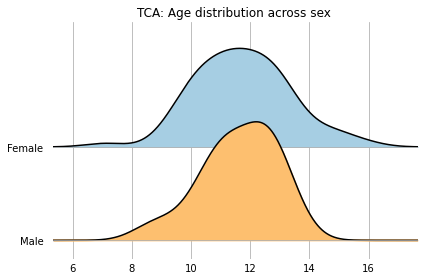

Age = [7.1,15.9]


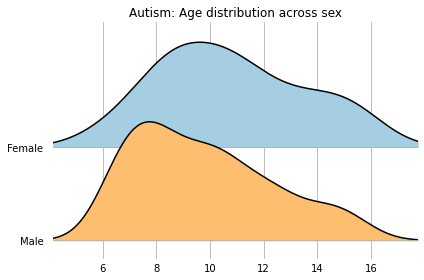

Age = [6.1,15.8]


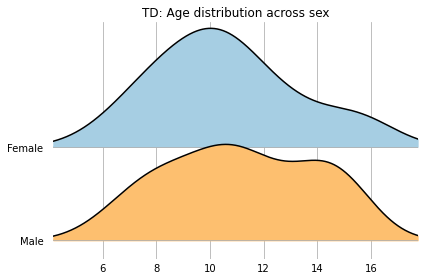

Age = [6.1,15.8]


In [180]:
fig, axes = joypy.joyplot(df_tca[['age_at_scan', 'Sex']], by = 'Sex', grid = True, 
                         title = 'TCA: Age distribution across sex ',
                         ylim = 'max',
                         colormap = cm.Paired)
plt.show()
print(f'Age = [{df_tca.age_at_scan.min()},{df_tca.age_at_scan.max()}]')
fig, axes = joypy.joyplot(df_asd[['age_at_scan', 'sex']].replace({-1 : 'Female', 1 : 'Male'}), by = 'sex', grid = True, 
                         title = 'Autism: Age distribution across sex',
                         ylim = 'max',
                         colormap = cm.Paired)
plt.show()
print(f'Age = [{df_asd.age_at_scan.min()},{df_asd.age_at_scan.max()}]')
fig, axes = joypy.joyplot(df_td[['age_at_scan', 'sex']].replace({-1 : 'Female', 1 : 'Male'}), by = 'sex', grid = True, 
                         title = 'TD: Age distribution across sex',
                         ylim = 'max',
                         colormap = cm.Paired)
plt.show()
print(f'Age = [{df_td.age_at_scan.min()},{df_td.age_at_scan.max()}]')

# Matching sex distribution

In [181]:
df_td.groupby(['sex', 'ASD']).size()

sex  ASD
-1   No     24
 1   No     43
dtype: int64

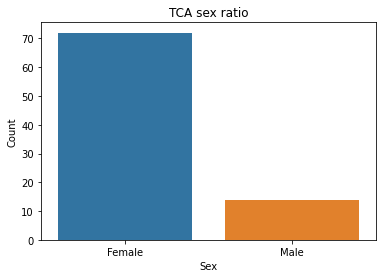

      Sex  Count
0  Female     72
1    Male     14


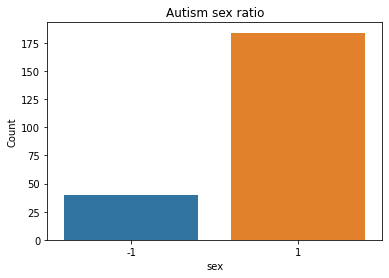

   sex  Count
0   -1     40
1    1    184


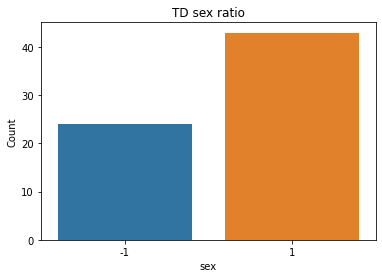

   sex  Count
0   -1     24
1    1     43


In [182]:
sns.barplot(y = 'Count', x = 'Sex', data = (df_tca.groupby('Sex').size()).to_frame('Count').reset_index())
plt.title('TCA sex ratio')
plt.show()
print(df_tca.groupby('Sex').size().to_frame('Count').reset_index())


sns.barplot(y = 'Count', x = 'sex', data = (df_asd.groupby('sex').size()).to_frame('Count').reset_index())
plt.title('Autism sex ratio')
plt.show()
print(df_asd.groupby('sex').size().to_frame('Count').reset_index())


sns.barplot(y = 'Count', x = 'sex', data = (df_td.groupby('sex').size()).to_frame('Count').reset_index())
plt.title('TD sex ratio')
plt.show()
print(df_td.groupby('sex').size().to_frame('Count').reset_index())

In [183]:
df_asd_M = df_asd[df_asd.sex == 1].sample(n = 14)
df_asd_F = df_asd[df_asd.sex == -1]
df_asd_sampled = pd.concat([df_asd_M, df_asd_F])

In [184]:
df_td_M = df_td[df_td.sex == 1].sample(n = 14)
df_td_F= df_td[df_td.sex == -1]
df_td_sampled = pd.concat([df_td_M, df_td_F])

# Sex and age distribution of matches datasets

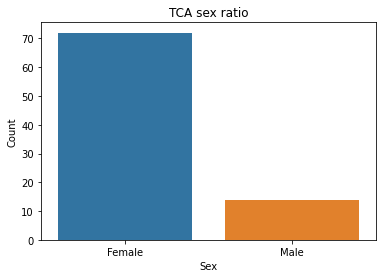

      Sex  Count
0  Female     72
1    Male     14


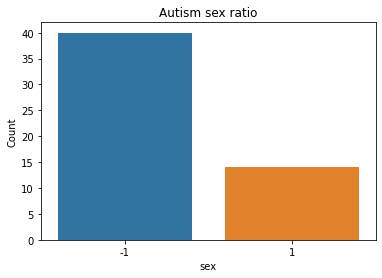

   sex  Count
0   -1     40
1    1     14


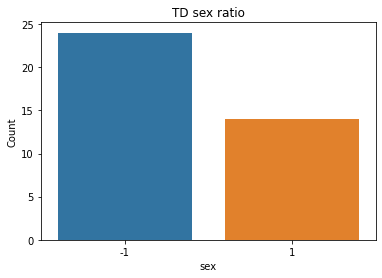

   sex  Count
0   -1     24
1    1     14


In [185]:
sns.barplot(y = 'Count', x = 'Sex', data = (df_tca.groupby('Sex').size()).to_frame('Count').reset_index())
plt.title('TCA sex ratio')
plt.show()
print(df_tca.groupby('Sex').size().to_frame('Count').reset_index())
sns.barplot(y = 'Count', x = 'sex', data = (df_asd_sampled.groupby('sex').size()).to_frame('Count').reset_index())
plt.title('Autism sex ratio')
plt.show()
print(df_asd_sampled.groupby('sex').size().to_frame('Count').reset_index())
sns.barplot(y = 'Count', x = 'sex', data = (df_td_sampled.groupby('sex').size()).to_frame('Count').reset_index())
plt.title('TD sex ratio')
plt.show()
print(df_td_sampled.groupby('sex').size().to_frame('Count').reset_index())

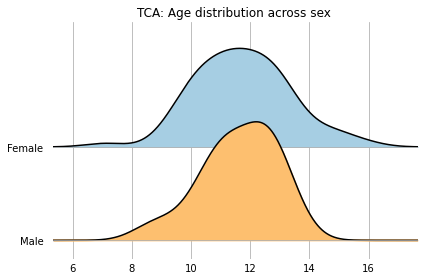

Age = [7.1,15.9]


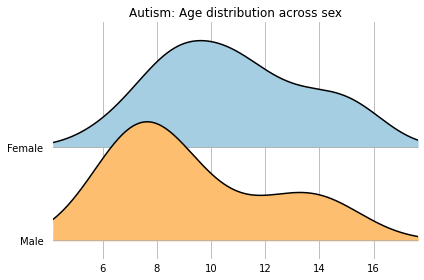

Age = [6.1,15.7]


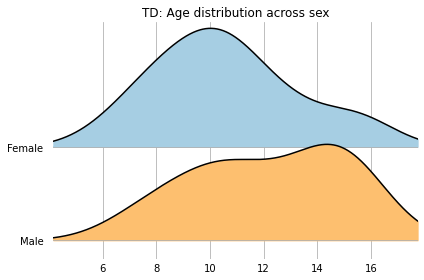

Age = [6.1,15.8]


In [186]:
fig, axes = joypy.joyplot(df_tca[['age_at_scan', 'Sex']], by = 'Sex', grid = True, 
                         title = 'TCA: Age distribution across sex ',
                         ylim = 'max',
                         colormap = cm.Paired)
plt.show()
print(f'Age = [{df_tca.age_at_scan.min()},{df_tca.age_at_scan.max()}]')
fig, axes = joypy.joyplot(df_asd_sampled[['age_at_scan', 'sex']].replace({-1 : 'Female', 1 : 'Male'}), by = 'sex', grid = True, 
                         title = 'Autism: Age distribution across sex',
                         ylim = 'max',
                         colormap = cm.Paired)
plt.show()
print(f'Age = [{df_asd_sampled.age_at_scan.min()},{df_asd_sampled.age_at_scan.max()}]')
fig, axes = joypy.joyplot(df_td_sampled[['age_at_scan', 'sex']].replace({-1 : 'Female', 1 : 'Male'}), by = 'sex', grid = True, 
                         title = 'TD: Age distribution across sex',
                         ylim = 'max',
                         colormap = cm.Paired)
plt.show()
print(f'Age = [{df_td_sampled.age_at_scan.min()},{df_td_sampled.age_at_scan.max()}]')

# Matching site distribution?

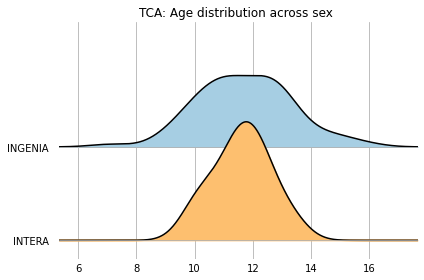

Age = [7.1,15.9]


KeyError: "['site'] not in index"

In [187]:
fig, axes = joypy.joyplot(df_tca[['age_at_scan', 'manufacturer_model_name']], by = 'manufacturer_model_name', grid = True, 
                         title = 'TCA: Age distribution across sex ',
                         ylim = 'max',
                         colormap = cm.Paired)
plt.show()
print(f'Age = [{df_tca.age_at_scan.min()},{df_tca.age_at_scan.max()}]')
fig, axes = joypy.joyplot(df_asd_sampled[['age_at_scan', 'site']].replace({-1 : 'Female', 1 : 'Male'}), by = 'site', grid = True, 
                         title = 'Autism: Age distribution across sex',
                         ylim = 'max',
                         colormap = cm.Paired)
plt.show()
print(f'Age = [{df_asd_sampled.age_at_scan.min()},{df_asd_sampled.age_at_scan.max()}]')
fig, axes = joypy.joyplot(df_td_sampled[['age_at_scan', 'sex']].replace({-1 : 'Female', 1 : 'Male'}), by = 'sex', grid = True, 
                         title = 'TD: Age distribution across sex',
                         ylim = 'max',
                         colormap = cm.Paired)
plt.show()
print(f'Age = [{df_td_sampled.age_at_scan.min()},{df_td_sampled.age_at_scan.max()}]')

## Export matched datasets separately

In [ ]:
df_tca.to_csv(os.path.join(data_dir, 'TCA_vol/Outputs/df_tca_matched.csv'), index = False)
df_asd_sampled.to_csv(os.path.join(data_dir, 'TSA_vol/Outputs/df_asd_matched.csv'), index = False)
df_td_sampled.to_csv(os.path.join(data_dir, 'TSA_vol/Outputs/df_td_matched.csv'), index = False)

## Export all datasets in one

In [188]:
df_3groups = pd.concat([df_asd_sampled, df_td_sampled, df_tca])

In [189]:
df_3groups['participant_id']

578       1102
600       1142
171        452
31         473
609       1156
        ...   
83     141_TCA
84     142_TCA
87     159_TCA
88     166_TCA
99     181_TCA
Name: participant_id, Length: 178, dtype: object

In [191]:
df_3groups.to_csv(os.path.join(data_dir, 'TCA_vol/Outputs/df_3groups.csv'), index = False)

In [105]:
df_3groups['participant_id'].to_csv(os.path.join(data_dir, 'TCA_vol/Outputs/partticipant_id.csv'), index = False)

In [126]:
for i in df_3groups:
    print(i)

Subject
lh_bankssts_area
lh_caudalanteriorcingulate_area
lh_caudalmiddlefrontal_area
lh_cuneus_area
lh_entorhinal_area
lh_fusiform_area
lh_inferiorparietal_area
lh_inferiortemporal_area
lh_isthmuscingulate_area
lh_lateraloccipital_area
lh_lateralorbitofrontal_area
lh_lingual_area
lh_medialorbitofrontal_area
lh_middletemporal_area
lh_parahippocampal_area
lh_paracentral_area
lh_parsopercularis_area
lh_parsorbitalis_area
lh_parstriangularis_area
lh_pericalcarine_area
lh_postcentral_area
lh_posteriorcingulate_area
lh_precentral_area
lh_precuneus_area
lh_rostralanteriorcingulate_area
lh_rostralmiddlefrontal_area
lh_superiorfrontal_area
lh_superiorparietal_area
lh_superiortemporal_area
lh_supramarginal_area
lh_frontalpole_area
lh_temporalpole_area
lh_transversetemporal_area
lh_insula_area
lh_WhiteSurfArea_area
BrainSegVolNotVent_x_x
eTIV_x_x
rh_bankssts_area
rh_caudalanteriorcingulate_area
rh_caudalmiddlefrontal_area
rh_cuneus_area
rh_entorhinal_area
rh_fusiform_area
rh_inferiorparietal_area

In [124]:
list(df_3groups)

['Subject',
 'lh_bankssts_area',
 'lh_caudalanteriorcingulate_area',
 'lh_caudalmiddlefrontal_area',
 'lh_cuneus_area',
 'lh_entorhinal_area',
 'lh_fusiform_area',
 'lh_inferiorparietal_area',
 'lh_inferiortemporal_area',
 'lh_isthmuscingulate_area',
 'lh_lateraloccipital_area',
 'lh_lateralorbitofrontal_area',
 'lh_lingual_area',
 'lh_medialorbitofrontal_area',
 'lh_middletemporal_area',
 'lh_parahippocampal_area',
 'lh_paracentral_area',
 'lh_parsopercularis_area',
 'lh_parsorbitalis_area',
 'lh_parstriangularis_area',
 'lh_pericalcarine_area',
 'lh_postcentral_area',
 'lh_posteriorcingulate_area',
 'lh_precentral_area',
 'lh_precuneus_area',
 'lh_rostralanteriorcingulate_area',
 'lh_rostralmiddlefrontal_area',
 'lh_superiorfrontal_area',
 'lh_superiorparietal_area',
 'lh_superiortemporal_area',
 'lh_supramarginal_area',
 'lh_frontalpole_area',
 'lh_temporalpole_area',
 'lh_transversetemporal_area',
 'lh_insula_area',
 'lh_WhiteSurfArea_area',
 'BrainSegVolNotVent_x_x',
 'eTIV_x_x',
